In [2]:
import pyspark
import pandas as pd
import matplotlib.pyplot as plt

from influxdb_client import InfluxDBClient
from influxdb_client.client.write_api import SYNCHRONOUS

from math import sin, cos

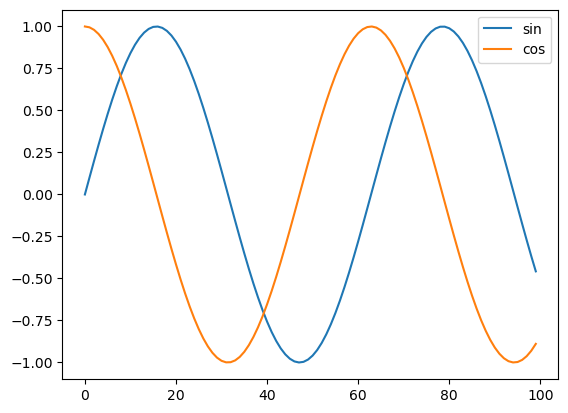

In [9]:
# Generate dataframe to test with

time = []
sin_x = []
cos_x = []

for i in range(0,100):
    time.append(i)
    sin_x.append(sin(i /10))
    cos_x.append(cos(i /10))


plt.plot(time, sin_x, label="sin")
plt.plot(time, cos_x, label="cos")
plt.legend()
plt.show()

In [4]:
# Convert data to dataframe
df = pd.DataFrame(list(zip(time, sin_x)), columns=["time", "sin_x"])
df['time'] = pd.to_datetime(df['time'], unit='s')
df.head()

,time,sin_x,cos_x
0,1970-01-01 00:00:00,0.000000,1.00000
1,1970-01-01 00:00:01,0.010000,0.99995
2,1970-01-01 00:00:02,0.019999,0.99980
3,1970-01-01 00:00:03,0.029996,0.99955
4,1970-01-01 00:00:04,0.039989,0.99920


In [5]:
# Write data to database

url = "http://localhost:8086"
bucket = "testBucket"
token="L9aO2ZCpKWUV-jZncfsXB0CauuwrChRbOwC5PtcjzWFXGkE75lh24NTpIanN-aYXMCMgOTsJpcM8sUrJWL0tCw=="

with InfluxDBClient(url=url, token=token, org="teco") as client:
   res = client.write_api(write_options=SYNCHRONOUS).write(bucket=bucket, record=df, data_frame_measurement_name="weather", data_frame_timestamp_column="time")
   print(res)

NewConnectionError: <urllib3.connection.HTTPConnection object at 0x7fb7fac2f610>: Failed to establish a new connection: [Errno 61] Connection refused

In [ ]:
with InfluxDBClient(url=url, token=token, org="teco") as client:
    print(client.ping())
    client.query_api().query('from(bucket:"testBucket")')

True


AttributeError: 'function' object has no attribute 'query'